# ICS project

[G.Form](https://docs.google.com/forms/d/1t4p6s6IyfVewz-zqlr1MhtrFv_S5CCtSJCjQkSXKooA/edit#response=ACYDBNjpmfUi1ZrauxOsHcDWAVOdSwpMrzQ467gzP6YU4e819uQGFP4r1X4x) <br>

## 0) Context

Sophie wants to study ChIP-Seq samples from 2 publications (organism = _Mus musculus_). <br>
Each publication as an associated GEO dataset where BIGWIGs are already available. <br>
Goal = For each sample, display density tracks & underlying values. <br>
Focus = 4 regions of interest : smu, sgamma1, sgamma3, 3'RR.

## 1) Download published datasets

##### Set correct ICS project folder & path on your computer

In [ ]:
### CODE ###
mkdir -p /home/scaonp01/Desktop/ICS/BISCEm;
ics='/home/scaonp01/Desktop/ICS/BISCEm';

### 1.0) Chrom.sizes file

In [1]:
### CODE ###
wget --version | sed -n '1p';

GNU Wget 1.17.1 built on linux-gnu.


In [ ]:
### CODE ###
cd $ics//Data;
wget -q http://hgdownload.cse.ucsc.edu/goldenPath/mm9/bigZips/mm9.chrom.sizes;

### 1.1) [Publication #1](https://goo.gl/15mT8Y)

Here Sophie is looking for ChIP-Seq on activated B cells & resting B cells for the following acetylation & methylation marks : H4K16_ac, H4K20_me1 & me3, H3K36_me1, me2 & me3, H3K9_me1, me2 & me3.

##### Download corresponding BIGWIGs ([GEO dataset](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE82144))

In [2]:
### CODE ###
axel --version | sed -n '2p';

Axel version 2.5 (Linux)


In [ ]:
### CODE ###
mkdir -p $ics/Data/Bigwig;
cd $ics/Data/Bigwig;
url='ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2184nnn';
axel -q $url/GSM2184253/suppl/GSM2184253_aB_wt_H4K16Ac.bw;
axel -q $url/GSM2184289/suppl/GSM2184289_rB_wt_H4K16Ac.bw;
axel -q $url/GSM2184254/suppl/GSM2184254_aB_wt_H4K20me1.bw;
axel -q $url/GSM2184255/suppl/GSM2184255_aB_wt_H4K20me3.bw;
axel -q $url/GSM2184290/suppl/GSM2184290_rB_wt_H4K20me1.bw;
axel -q $url/GSM2184291/suppl/GSM2184291_rB_wt_H4K20me3.bw;
axel -q $url/GSM2184238/suppl/GSM2184238_aB_wt_H3K36me1.bw;
axel -q $url/GSM2184239/suppl/GSM2184239_aB_wt_H3K36me2.bw;
axel -q $url/GSM2184240/suppl/GSM2184240_aB_wt_H3K36me3.bw;
axel -q $url/GSM2184274/suppl/GSM2184274_rB_wt_H3K36me1.bw;
axel -q $url/GSM2184275/suppl/GSM2184275_rB_wt_H3K36me2.bw;
axel -q $url/GSM2184276/suppl/GSM2184276_rB_wt_H3K36me3.bw;
axel -q $url/GSM2184249/suppl/GSM2184249_aB_wt_H3K9me1.bw;
axel -q $url/GSM2184250/suppl/GSM2184250_aB_wt_H3K9me2.bw;
axel -q $url/GSM2184251/suppl/GSM2184251_aB_wt_H3K9me3.bw;
axel -q $url/GSM2184285/suppl/GSM2184285_rB_wt_H3K9me1.bw;
axel -q $url/GSM2184286/suppl/GSM2184286_rB_wt_H3K9me2.bw;
axel -q $url/GSM2184287/suppl/GSM2184287_rB_wt_H3K9me3.bw;

### 1.2) [Publication #2](https://goo.gl/DQddu4)

Sophie told us to retrieve the following samples : GSM1040416, GSM1040430, GSM1040431, GSM1040436, GSM1040437.

##### Download corresponding WIGs ([GEO dataset](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE42451))

In [ ]:
### CODE ###
cd $ics/Data;
url='ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1040nnn';
axel -q $url/GSM1040416/suppl/GSM1040416_activatedB_AIDwt_RAD51ip.wig.gz;
axel -q $url/GSM1040430/suppl/GSM1040430_activatedB_WT_G1_gH2AXip_a.wig.gz;
axel -q $url/GSM1040431/suppl/GSM1040431_activatedB_WT_S_gH2AXip_a.wig.gz;
axel -q $url/GSM1040436/suppl/GSM1040436_thymocyte_WT_RPAip_a.wig.gz;
axel -q $url/GSM1040437/suppl/GSM1040437_thymocyte_WT_RPAip_b.wig.gz;
for f in *.wig.gz;
do unpigz $f;
done;

##### Convert WIG to BIGWIG

In [ ]:
### CODE ###
wget -q http://hgdownload.cse.ucsc.edu/admin/exe/linux.x86_64/wigToBigWig;
sudo chmod +x wigToBigWig;

In [3]:
### CODE ###
./wigToBigWig 2>&1 cat | grep -Po 'wigToBigWig v ([0-9]+)';

wigToBigWig v 4


In [ ]:
### CODE ###
for f in *.wig;
do ./wigToBigWig $f \
                 $ics/Data/mm9.chrom.sizes \
                 $ics/Data/Bigwig/${f%.*}.bw;
done;
rm *.wig wigToBigWig;

##### Rename files for easier use & better track name display in IGV

In [ ]:
### CODE ###
cd $ics/Data/Bigwig;
mv GSM2184238_aB_wt_H3K36me1.bw Actv_B_WT_H3K36_me1.bw;
mv GSM2184239_aB_wt_H3K36me2.bw Actv_B_WT_H3K36_me2.bw;
mv GSM2184240_aB_wt_H3K36me3.bw Actv_B_WT_H3K36_me3.bw;
mv GSM2184249_aB_wt_H3K9me1.bw Actv_B_WT_H3K9_me1.bw;
mv GSM2184250_aB_wt_H3K9me2.bw Actv_B_WT_H3K9_me2.bw;
mv GSM2184251_aB_wt_H3K9me3.bw Actv_B_WT_H3K9_me3.bw;
mv GSM2184253_aB_wt_H4K16Ac.bw Actv_B_WT_H4K16_ac.bw;
mv GSM2184254_aB_wt_H4K20me1.bw Actv_B_WT_H4K20_me1.bw;
mv GSM2184255_aB_wt_H4K20me3.bw Actv_B_WT_H4K20_me3.bw;
mv GSM2184274_rB_wt_H3K36me1.bw Rest_B_WT_H3K36_me1.bw;
mv GSM2184275_rB_wt_H3K36me2.bw Rest_B_WT_H3K36_me2.bw;
mv GSM2184276_rB_wt_H3K36me3.bw Rest_B_WT_H3K36_me3.bw;
mv GSM2184285_rB_wt_H3K9me1.bw Rest_B_WT_H3K9_me1.bw;
mv GSM2184286_rB_wt_H3K9me2.bw Rest_B_WT_H3K9_me2.bw;
mv GSM2184287_rB_wt_H3K9me3.bw Rest_B_WT_H3K9_me3.bw;
mv GSM2184289_rB_wt_H4K16Ac.bw Rest_B_WT_H4K16_ac.bw;
mv GSM2184290_rB_wt_H4K20me1.bw Rest_B_WT_H4K20_me1.bw;
mv GSM2184291_rB_wt_H4K20me3.bw Rest_B_WT_H4K20_me3.bw;
mv GSM1040437_thymocyte_WT_RPAip_b.bw wt_thymocyte_RPAip_b.bw;
mv GSM1040436_thymocyte_WT_RPAip_a.bw wt_thymocyte_RPAip_a.bw;
mv GSM1040431_activatedB_WT_S_gH2AXip_a.bw wt_activatedB_S_gH2AXip_a.bw;
mv GSM1040430_activatedB_WT_G1_gH2AXip_a.bw wt_activatedB_G1_gH2AXip_a.bw;
mv GSM1040416_activatedB_AIDwt_RAD51ip.bw wt_aid_activatedB_RAD51ip.bw;

## 2) BIGWIGs visualization

### 2.1) Get mm9 locations for regions of interest

#### 2.2) Retrieve regions of interest FASTA sequences

_Ps_ : Thanks to Bastien & old LSR (CSReport) project data

In [4]:
### CODE ###
samtools='/home/scaonp01/Software/Samtools_1.9/samtools';
samtools --version | head -2;

samtools 1.7
Using htslib 1.7


In [ ]:
### CODE ###
mkdir -p $ics/Data/IgH;
cd $ics/Data/IgH;
$samtools faidx ighc57.fasta chr12:575-45534 > 3p_rr.fasta;
$samtools faidx ighc57.fasta chr12:122523-131523 > s_gamma_1.fasta;
$samtools faidx ighc57.fasta chr12:153232-158232 > s_gamma_3.fasta;
$samtools faidx ighc57.fasta chr12:214730-217918 > s_mu.fasta;

#### 2.3) Align these vs mm9 @[UCSC](https://genome.ucsc.edu/cgi-bin/hgBlat)

Options used : Mouse, July 2007 (NCBI37/mm9), DNA, query,score, hyperlink

##### Raw output

3p_rr_chr12:575-45534 40246     1 40246 44960 100.0%    12   +  114446786 114487031  40246 <br>
s_gamma_1_chr12:122523-131523  9001     1  9001  9001 100.0%    12   +  114568734 114577734   9001 <br>
s_gamma_3_chr12:153232-158232  5001     1  5001  5001 100.0%    12   +  114599443 114604443   5001 <br>
s_mu_chr12:214730-217918  3189     1  3189  3189 100.0%    12   +  114660941 114664129   3189 <br>

##### Yielding the positions listed below for each region of interest

**3p_RR (40245 nts)** <br>
chr12:114446786-114487031 <br>
**s_gamma_1 (9000 nts)** <br>
chr12:114568734-114577734 <br>
**s_gamma_3 (5000 nts)** <br>
chr12:114599443-114604443 <br>
**s_mu (3188 nts)** <br>
chr12:114660941-114664129 <br>

##### Create associated BED files

In [ ]:
### CODE ###
cd $ics/Data/IgH;
printf 'chr12\t114446786\t114487031\t3pRR' > 3p_rr.bed;
printf 'chr12\t114568734\t114577734\ts_gamma_1' > s_gamma_1.bed;
printf 'chr12\t114599443\t114604443\ts_gamma_3' > s_gamma_3.bed;
printf 'chr12\t114660941\t114664129\ts_mu' > s_mu.bed;

### 2.2) IGV screenshots

Using : IGV 2.4.14 <br>
_Ps_ : Only compare samples coming from the same publication, as they were normalized accordingly.

In [ ]:
### CODE ###
mkdir -p $ics/Outputs/IGV;
cd $ics/Outputs/IGV;

_Ps_ : All samples were log-scaled to the highest value amongst samples inside the given region

##### Publication #1, respectively : 3p_rr, s_gamma_1, s_gamma_3 & s_mu

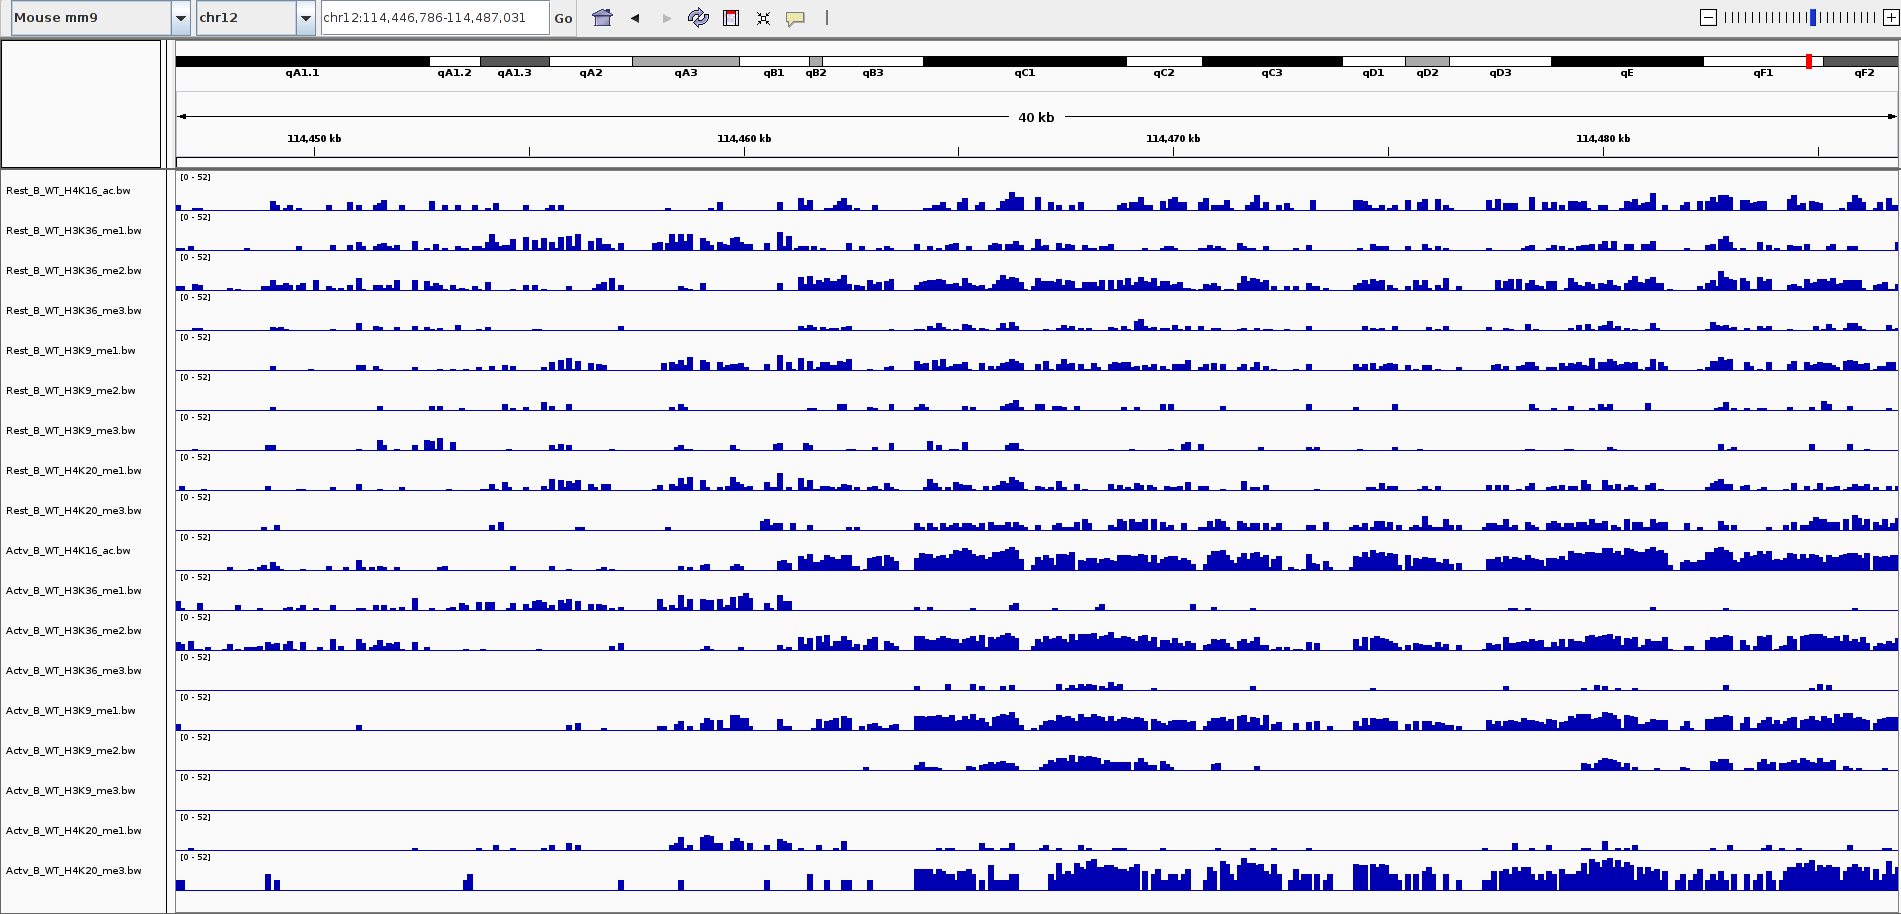

In [5]:
### CODE ###
display < ./Picture/3p_rr_publi_1.png;

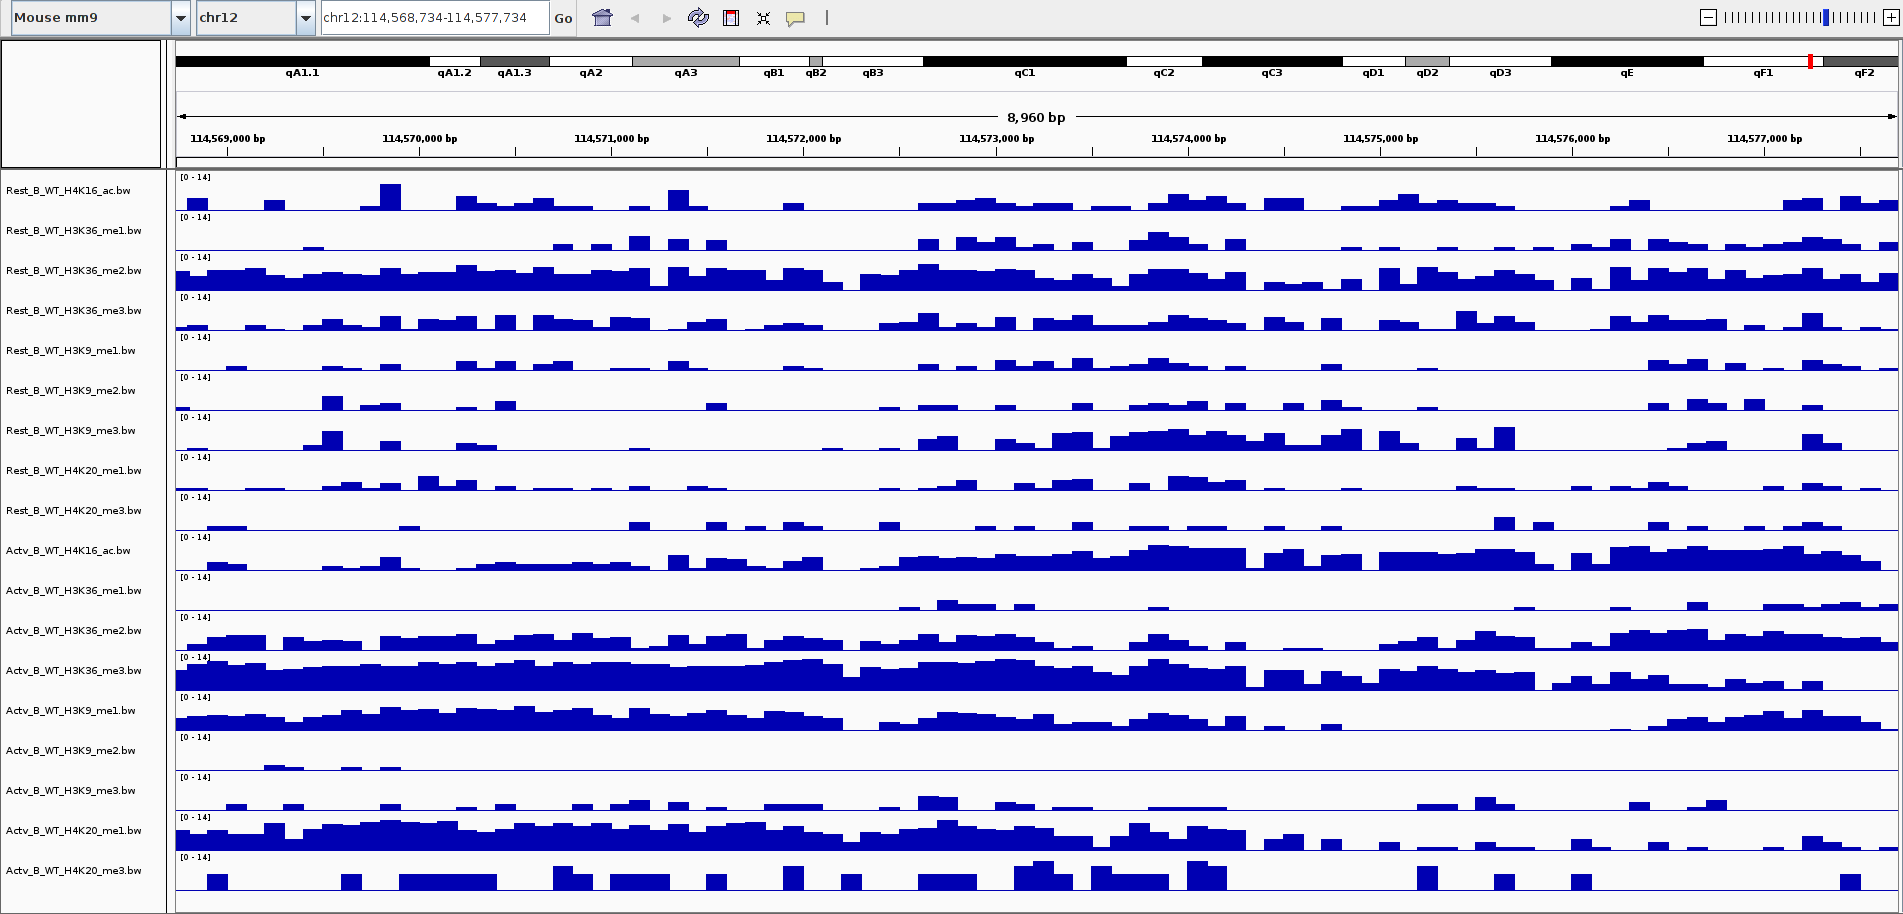

In [6]:
### CODE ###
display < ./Picture/s_gamma_1_publi_1.png;

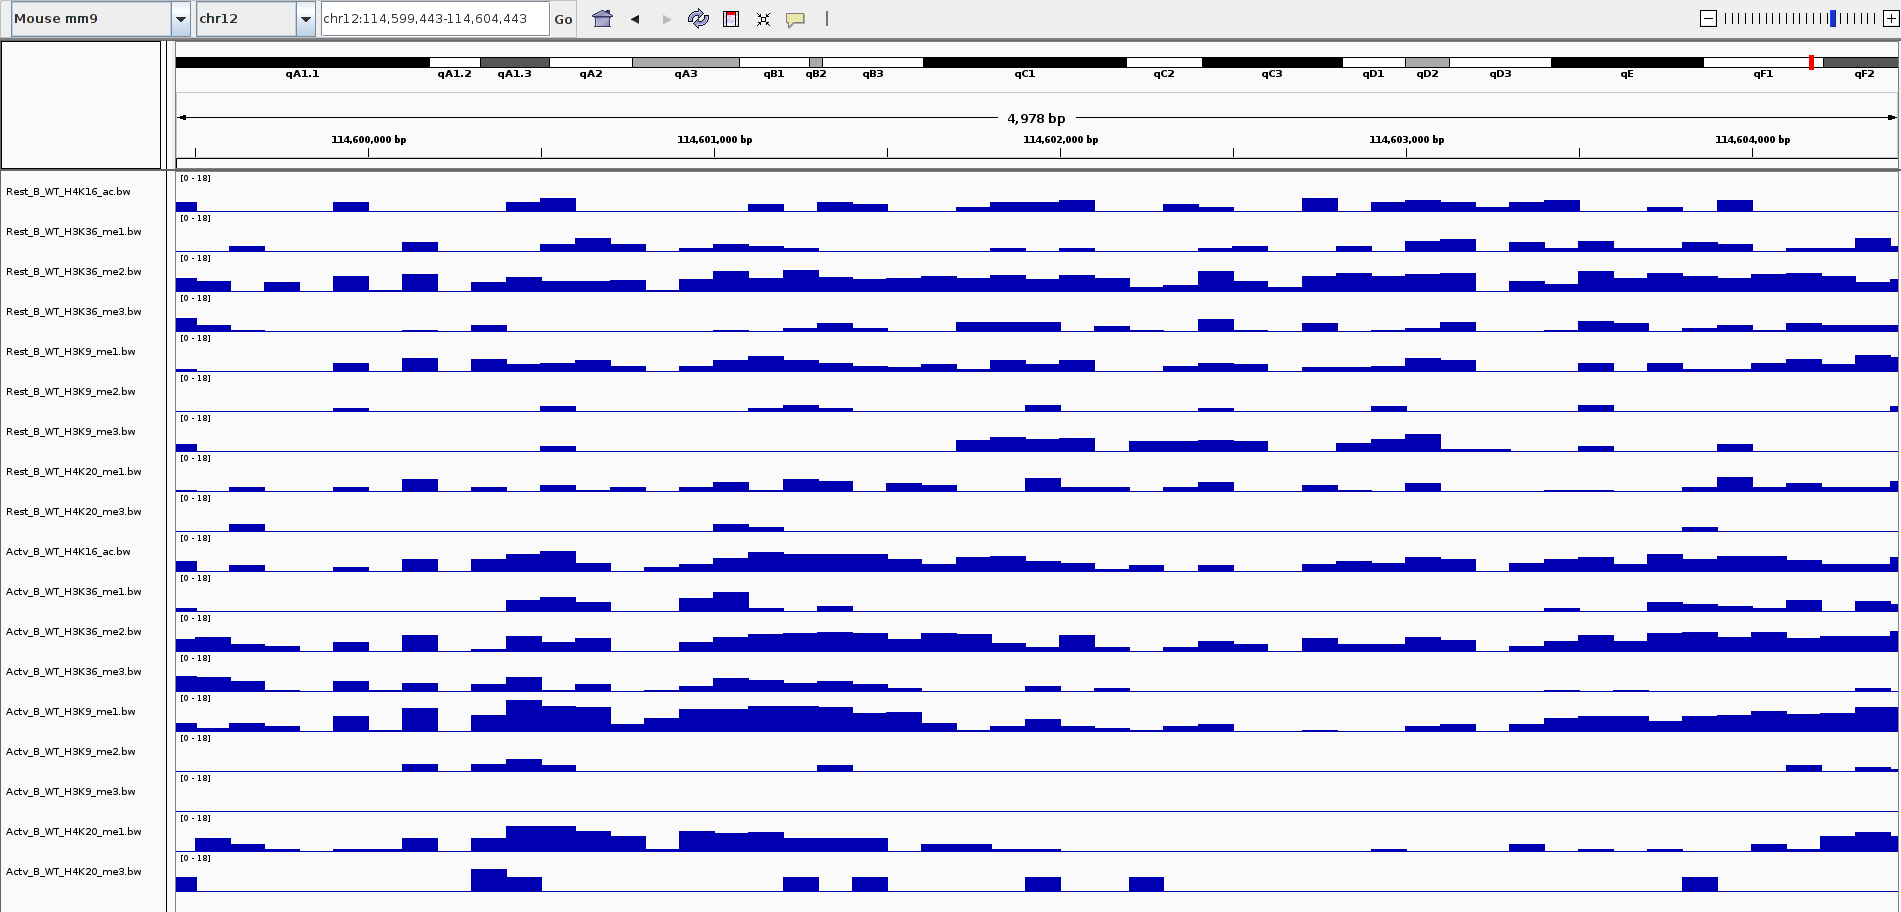

In [7]:
### CODE ###
display < ./Picture/s_gamma_3_publi_1.png;

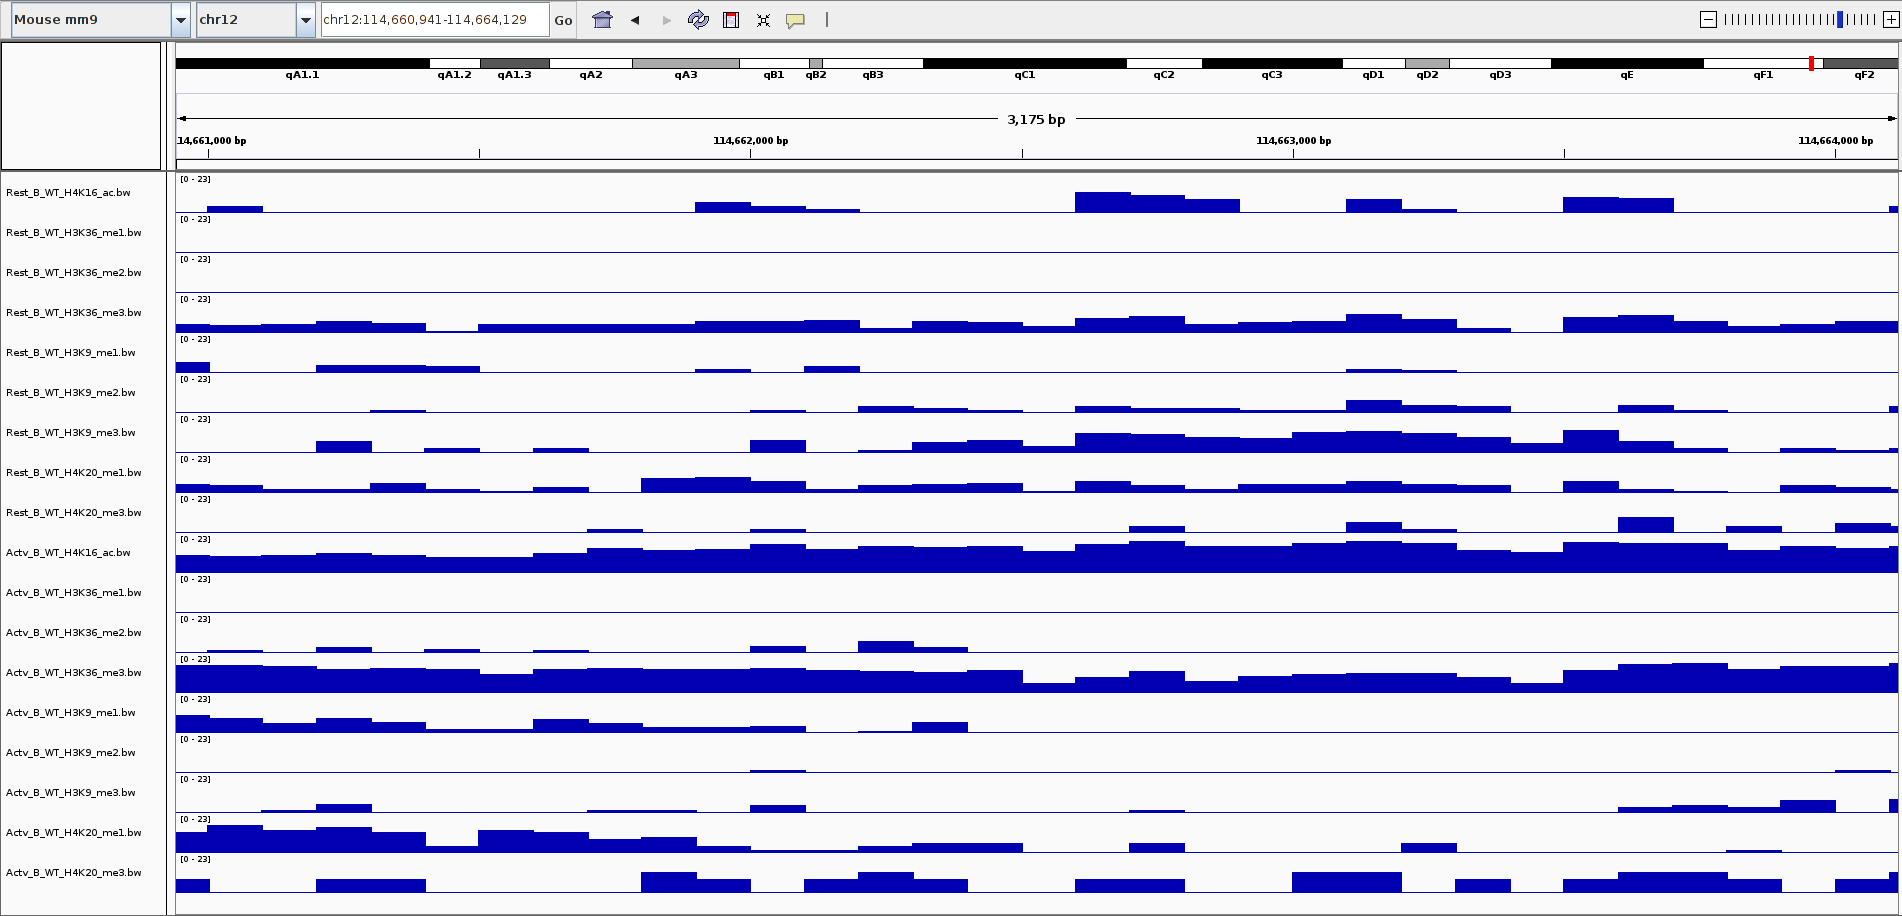

In [8]:
### CODE ###
display < ./Picture/s_mu_publi_1.png;

##### Publication #2, respectively : 3p_rr, s_gamma_1, s_gamma_3 & s_mu

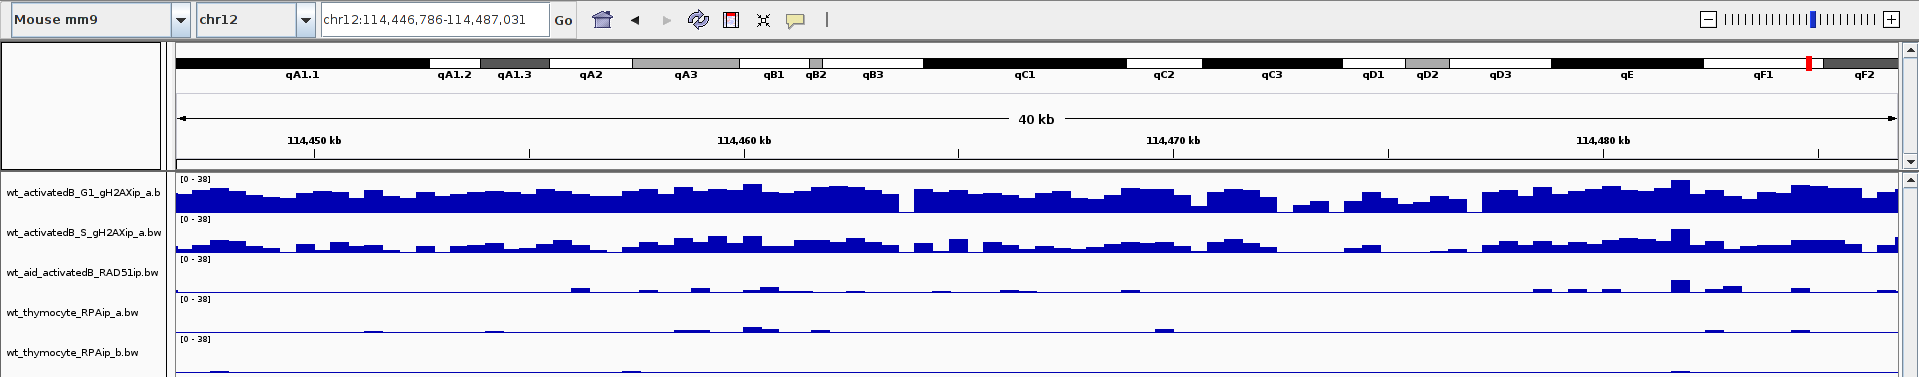

In [9]:
### CODE ###
display < ./Picture/3p_rr_publi_2.png;

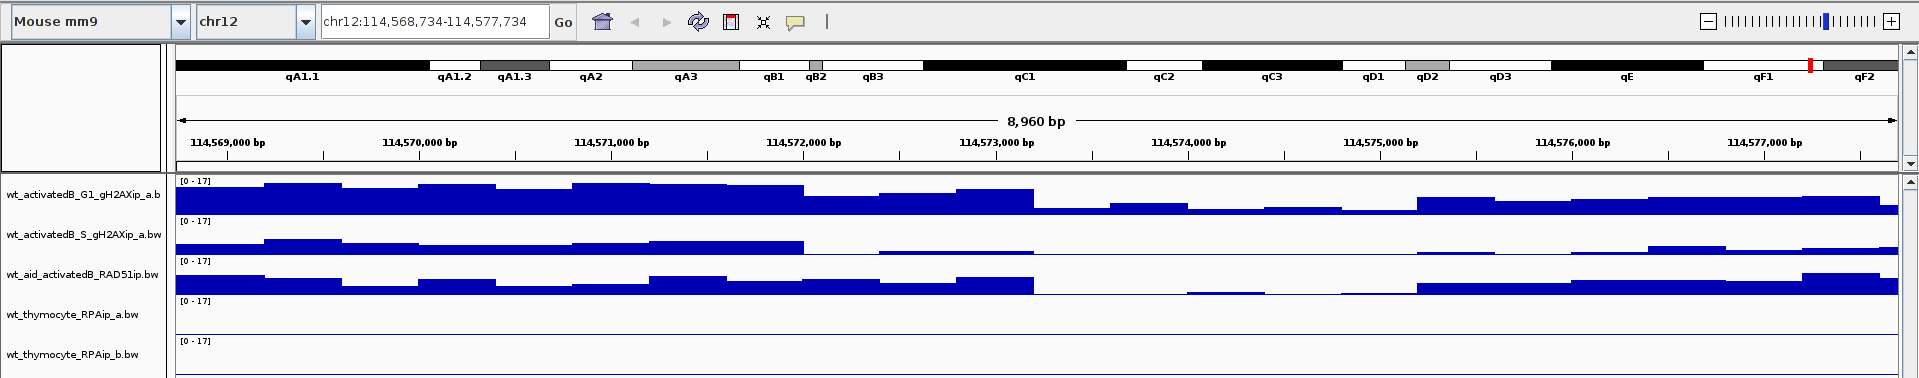

In [10]:
### CODE ###
display < ./Picture/s_gamma_1_publi_2.png;

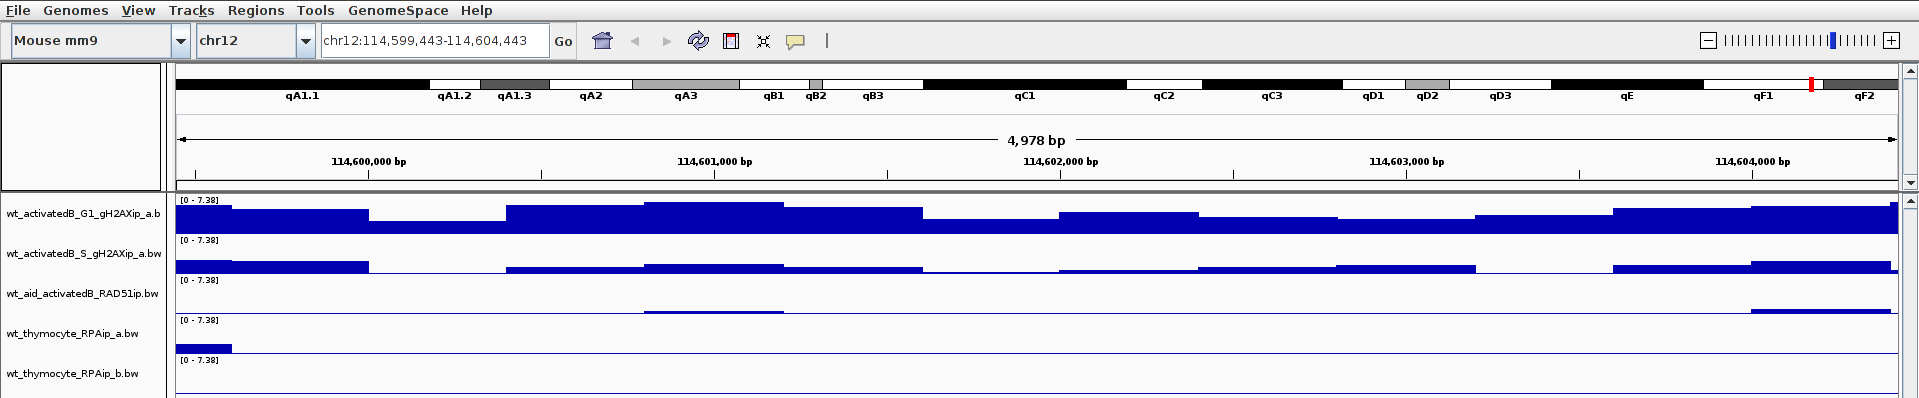

In [11]:
### CODE ###
display < ./Picture/s_gamma_3_publi_2.png;

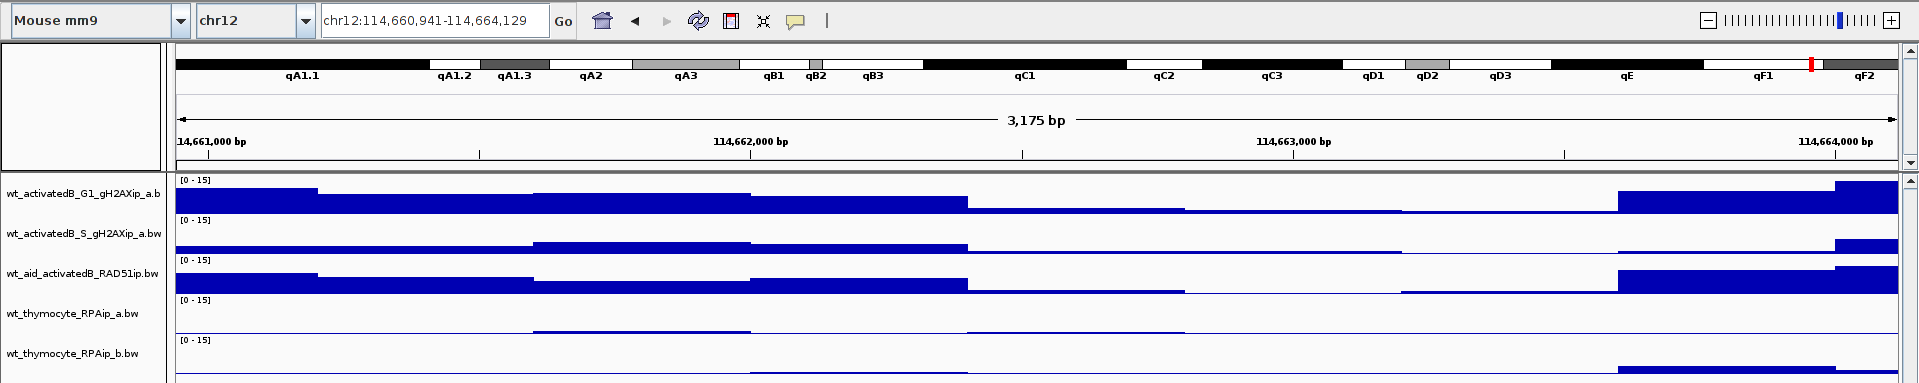

In [12]:
### CODE ###
display < ./Picture/s_mu_publi_2.png;

## 3) BIGWIGs to actual values

### 3.1) Convert BIGWIG to BEDGRAPH

Using bigWigToBedGraph version 370 at time of [download](http://hgdownload.cse.ucsc.edu/admin/exe/linux.x86_64)

In [ ]:
### CODE ###
cd $ics/Data/Bigwig;
mkdir -p $ics/Outputs/Bedgraph_from_bigwig;
wget -q http://hgdownload.cse.ucsc.edu/admin/exe/linux.x86_64/bigWigToBedGraph;
sudo chmod +x bigWigToBedGraph;
for f in *.bw;
do ./bigWigToBedGraph $f \
                      $ics/Outputs/Bedgraph_from_bigwig/${f%.*}.bedgraph;
done;
rm bigWigToBedGraph;

### 3.2) Retrieve counts for regions of interest

In [13]:
### CODE ###
bedtools --version;

bedtools v2.27.1


In [ ]:
### CODE ###
cd $ics/Outputs/Bedgraph_from_bigwig;
mkdir -p $ics/Outputs/Bedgraph_regions/Per_samples_per_regions;
path='/home/scaonp01/Desktop/ICS/BISCEm/Outputs/Bedgraph_regions/Per_samples_per_regions';
for BEDGRAPH in *.bedgraph;
do for BED in $ics/Data/IgH/*.bed;
   do bedtools intersect -a $BEDGRAPH \
                         -b $BED \
                         > $path/${BEDGRAPH%.*}'_'$(basename ${BED%.*})'.tsv';
   done;
done;

### 3.3) Create spreadsheets, compiling bedgraph values at the sample or region level

#### 3.3.1) Per samples

In [ ]:
### CODE ###
cd $ics/Outputs/Bedgraph_regions/Per_samples_per_regions;
mkdir -p $ics/Outputs/Bedgraph_regions/Per_samples_compilation;
for id in 'Actv_B_WT_H3K36_me1' 'Actv_B_WT_H3K36_me2' 'Actv_B_WT_H3K36_me3' \
          'Actv_B_WT_H3K9_me1' 'Actv_B_WT_H3K9_me2' 'Actv_B_WT_H3K9_me3' 'Actv_B_WT_H4K16_ac' \
          'Actv_B_WT_H4K20_me1' 'Actv_B_WT_H4K20_me3' 'Rest_B_WT_H3K36_me1' 'Rest_B_WT_H3K36_me2' \
          'Rest_B_WT_H3K36_me3' 'Rest_B_WT_H3K9_me1' 'Rest_B_WT_H3K9_me2' 'Rest_B_WT_H3K9_me3' \
          'Rest_B_WT_H4K16_ac' 'Rest_B_WT_H4K20_me1' 'Rest_B_WT_H4K20_me3' 'wt_activatedB_G1_gH2AXip_a' \
          'wt_activatedB_S_gH2AXip_a' 'wt_aid_activatedB_RAD51ip' 'wt_thymocyte_RPAip_a' 'wt_thymocyte_RPAip_b';
do bedtools unionbedg -header \
                      -empty \
                      -g $ics/Data/mm9.chrom.sizes \
                      -i $id'_3p_rr.tsv' $id'_s_gamma_1.tsv' $id'_s_gamma_3.tsv' $id'_s_mu.tsv' \
                      -names '3p_RR' 's_gamma_1' 's_gamma_3' 's_mu' \
                      > $ics/Outputs/Bedgraph_regions/Per_samples_compilation/'bedgraph_'$id'_all_values.tsv';
done;

#### 3.3.2) Per regions

_Warning_ : Samples can only be compared if they originate from the same publication (they where normalized so the we can compare them to each other)

##### Publication #1

In [ ]:
### CODE ###
cd $ics/Outputs/Bedgraph_regions/Per_samples_per_regions;
mkdir -p $ics/Outputs/Bedgraph_regions/Per_regions_compilation;
path='/home/scaonp01/Desktop/ICS/BISCEm/Outputs/Bedgraph_regions/Per_regions_compilation';
for id in '3p_rr' 's_gamma_1' 's_gamma_3' 's_mu';
do bedtools unionbedg -header \
                      -empty \
                      -g $ics/Data/mm9.chrom.sizes \
                      -i 'Actv_B_WT_H3K36_me1_'$id'.tsv' 'Actv_B_WT_H3K36_me2_'$id'.tsv' \
                         'Actv_B_WT_H3K36_me3_'$id'.tsv' 'Actv_B_WT_H3K9_me1_'$id'.tsv' \
                         'Actv_B_WT_H3K9_me2_'$id'.tsv' 'Actv_B_WT_H3K9_me3_'$id'.tsv' \
                         'Actv_B_WT_H4K16_ac_'$id'.tsv' 'Actv_B_WT_H4K20_me1_'$id'.tsv' \
                         'Actv_B_WT_H4K20_me3_'$id'.tsv' 'Rest_B_WT_H3K36_me1_'$id'.tsv' \
                         'Rest_B_WT_H3K36_me2_'$id'.tsv' 'Rest_B_WT_H3K36_me3_'$id'.tsv' \
                         'Rest_B_WT_H3K9_me1_'$id'.tsv' 'Rest_B_WT_H3K9_me2_'$id'.tsv' \
                         'Rest_B_WT_H3K9_me3_'$id'.tsv' 'Rest_B_WT_H4K16_ac_'$id'.tsv' \
                         'Rest_B_WT_H4K20_me1_'$id'.tsv' 'Rest_B_WT_H4K20_me3_'$id'.tsv' \
                      -names Actv_B_WT_H3K36_me1 Actv_B_WT_H3K36_me2 Actv_B_WT_H3K36_me3 \
                             Actv_B_WT_H3K9_me1 Actv_B_WT_H3K9_me2 Actv_B_WT_H3K9_me3 Actv_B_WT_H4K16_ac \
                             Actv_B_WT_H4K20_me1 Actv_B_WT_H4K20_me3 Rest_B_WT_H3K36_me1 Rest_B_WT_H3K36_me2 \
                             Rest_B_WT_H3K36_me3 Rest_B_WT_H3K9_me1 Rest_B_WT_H3K9_me2 Rest_B_WT_H3K9_me3 \
                             Rest_B_WT_H4K16_ac Rest_B_WT_H4K20_me1 Rest_B_WT_H4K20_me3 \
                      > $path/'bedgraph_'$id'_all_values_publi_1.tsv';
done;

##### Publication #2

In [ ]:
### CODE ###
for id in '3p_rr' 's_gamma_1' 's_gamma_3' 's_mu';
do bedtools unionbedg -header \
                      -empty \
                      -g $ics/Data/mm9.chrom.sizes \
                      -i 'wt_activatedB_G1_gH2AXip_a_'$id'.tsv' 'wt_activatedB_S_gH2AXip_a_'$id'.tsv' \
                         'wt_aid_activatedB_RAD51ip_'$id'.tsv' 'wt_thymocyte_RPAip_a_'$id'.tsv' \
                         'wt_thymocyte_RPAip_b_'$id'.tsv' \
                      -names wt_activatedB_G1_gH2AXip_a wt_activatedB_S_gH2AXip_a wt_aid_activatedB_RAD51ip \
                             wt_thymocyte_RPAip_a wt_thymocyte_RPAip_b \
                      > $path/'bedgraph_'$id'_bis_all_values_publi_2.tsv';
done;